<a href="https://colab.research.google.com/github/DrueStaples/Kmeans_Farm_Crops/blob/master/Helping_Farmers_with_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome Everyone! Today we are going to be helping an agriculturer determine what can help his/her crops grow more efficiently! The farmer has tested out different methods (varying water, light, fertilizer, etc.) and in result is coming out with some crops doing better than others. The farmer needs our help to understand the data more so they can proceed with growing his/her farm. We will be taking in a set of individual crop-heights that have been  recorded from their land in hopes that we can find similarities within the groups. Let's get started, shall we?!

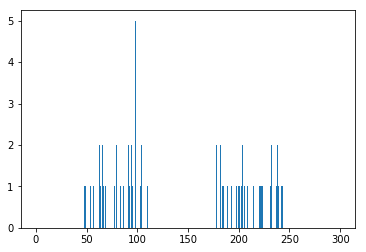

In [28]:
#Import your packages
import numpy as np
import cv2
from matplotlib import pyplot as plt



rand_nums_zero = np.random.randint(40,120,30) #30 random heights of crops between 40-120
rand_nums_one = np.random.randint(175,244,30) #30 random heights of crops between 175-244
result_vector = np.hstack((rand_nums_zero, rand_nums_one)) #horizontal vector of d and t
result_vector = result_vector.reshape((60,1)) #reshaping the result_vectore into 60 rows and 1 column
result_vector = np.float32(result_vector) #turn ints into floats
plt.hist(result_vector,300,[0,300]) #create a histogram of our result_vector
plt.show() #display the result_vector

#Apply the K-Means Algorithm

In [0]:
#criteria_for_our_kmeans = (type, iterations, epsilon)
#our algorithm will cease when either our iterations are reached OR when our epsilon = 1.0 
k_means_basis = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#set flags so we can just in case the code breaks
flags = cv2.KMEANS_RANDOM_CENTERS

#Apply Kmeans
density, labels, centroids = cv2.kmeans(result_vector, 2, None, k_means_basis, 10, flags)

In [0]:
#Split the data into separate slices of data
separate_data_0 = result_vector[labels == 0]
separate_data_1 = result_vector[labels == 1]

#Create a histogram that plots 'A' in red, 'B' in blue, and the centroids in yellow.

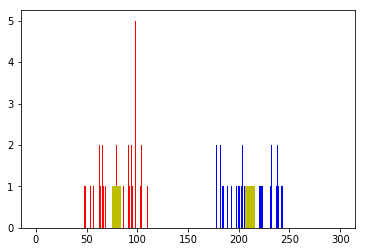

In [35]:
#what centroid to use, range of graph, range of bins, color of lines
plt.hist(separate_data_0, 300, [0,300], color = 'r') 
plt.hist(separate_data_1, 300, [0,300], color = 'b')
plt.hist(centroids, 32, [0,300], color = 'y')
plt.show() #display our graph

#What we are looking at is the use of k-means applied to an unknown (in this case, arbitrary heights) dataset. We have two spots highlighted in yellow which represent the centroids of each cluster.



---



#Congrats!  Now lets find clusters of groups that have 2 features:  Minutes of Sunlight vs Pints of Water

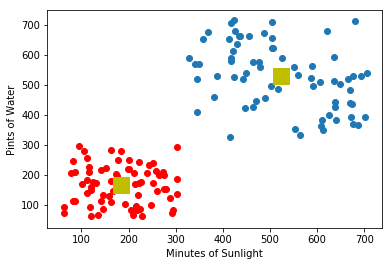

In [66]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

yield_0 = np.random.randint(60,305,(70,2)) #ranges from 60 to 305 with 70 data points

yield_1 = np.random.randint(324,720,(70,2)) #ranges form 324 to 720 with 70 data points

result_vector = np.vstack((yield_0,yield_1)) #place both yields into a single vector

# convert to np.float32
result_vector = np.float32(result_vector)

# define criteria and apply kmeans()
kmeans_basis = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

flags = cv2.KMEANS_RANDOM_CENTERS #just in case our code breaks

ret,label,centroids=cv2.kmeans(result_vector,2,None,kmeans_basis,10,flags)

# Now separate the data, Note the flatten()
sep_data_0 = result_vector[label.ravel()==0]
sep_data_1 = result_vector[label.ravel()==1]

# Plot the data
plt.scatter(sep_data_0[:,0],sep_data_0[:,1])
plt.scatter(sep_data_1[:,0],sep_data_1[:,1],c = 'r')
plt.scatter(centroids[:,0],centroids[:,1],s = 250,c = 'y', marker = 's')
plt.xlabel('Minutes of Sunlight'),plt.ylabel('Pints of Water')
plt.show()

#What you're looking at are 2 groups that share similar features! The farmer can now get a better idea of how to grow his garden! Thank you for all your help and I'm looking forward to our next mission!